# How Many Soldiers Do You Need To Beat The Night King?

This is my solution to the May 17th Riddler Classic on [FiveThirtyEight](https://fivethirtyeight.com/features/how-many-soldiers-do-you-need-to-beat-the-night-king/)

## Prompt

At a pivotal moment in an epic battle between the living and the dead, the Night King, head of the army of the dead, raises all the fallen (formerly) living soldiers to join his ranks. This ability obviously presents a huge military advantage, but how big an advantage exactly?

Forget the Battle of Winterfell and model our battle as follows. Each army lines up single file, facing the other army. One soldier steps forward from each line and the pair duels — half the time the living soldier wins, half the time the dead soldier wins. If the living soldier wins, he goes to the back of his army’s line, and the dead soldier is out (the living army uses dragonglass weapons, so the dead soldier is dead forever this time). If the dead soldier wins, he goes to the back of their army’s line, but this time the (formerly) living soldier joins him there. (Reanimation is instantaneous for this Night King.) The battle continues until one army is entirely eliminated.

What starting sizes of the armies, living and dead, give each army a 50-50 chance of winning?

## Solution
For this problem i used a dynamic programming approach. 

In [1]:
import numpy as np

In [2]:
def get_odds_matrix_up_to(Amounts):
    """
    calculates a matrix of probability of human victory and returns it
    :param Amounts: the size of the k * k matrix per dimension
    :return croppedOddsArray: Array of probability for human wins for m humans, n white walkers
    """

    # First we make base matrix with 1 as when no white walkers remain, signifying a human victory.
    oddsmatrix = [[0 for x in range(Amounts * 2)] for y in range(Amounts)] # Must be 2*Amounts to avoid outofboundserror
    oddsmatrix[0][0]= 0.5
    for i in range(1,Amounts):
        oddsmatrix[i][0] = 1

    for humans in range(1, Amounts):
        for whiteWalkers in range(1, Amounts):
            oddsmatrix[humans][whiteWalkers] = (oddsmatrix[humans][whiteWalkers - 1])/2 + (oddsmatrix[humans-1][whiteWalkers + 1])/2


    numpy_oddsmatrix = np.array(oddsmatrix)
    croppedOddsArray = numpy_oddsmatrix[:, :Amounts]  # reshape back into original size.
    return croppedOddsArray

I used the pyplot framwork to visualize the relationship between the sizes of armies and the prbability of human victory.

In [3]:
import matplotlib.pyplot as plt

In [4]:
oddsmatrix = get_odds_matrix_up_to(100)

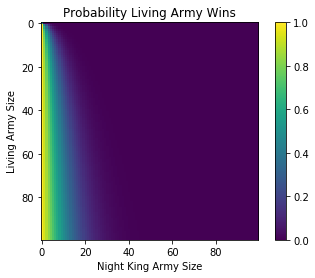

In [7]:
plt.imshow(oddsmatrix)
plt.title("Probability Living Army Wins")
plt.xlabel("Night King Army Size")
plt.ylabel("Living Army Size")
plt.savefig("knightking_colormap.pdf")
plt.colorbar()
plt.show()

As we can see, as armies expand, The white walkers advantage of having the knight king on their side is dominating, as they only need a army of a size in the teens when the humans have hundre to have a level playing field.